In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import tree

from preprocessing import *

plt.rcParams["figure.dpi"] = 60

# Carga del dataset

In [2]:
df = pd.read_csv("df_train.csv")
X = df.drop(columns=['llovieron_hamburguesas_al_dia_siguiente'])
y = df['llovieron_hamburguesas_al_dia_siguiente']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y.astype(str))

# Selección de modelos

Buscamos la mejor combinación de los hiperparámetros max_depth, min_samples_leaf y criterion, con 4 datasets distintos, utilizando Randomized Search.

In [3]:
X_train1 = preprocessing_arboles_1(X_train)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf1 = tree.DecisionTreeClassifier(random_state=117)

rgscv1 = RandomizedSearchCV(
    clf1, params, n_iter = 180, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train)

print(f"Best score: {rgscv1.best_score_}")
print(f"Best params {rgscv1.best_params_}")

Best score: 0.8566906156083679
Best params {'min_samples_leaf': 192, 'max_depth': 12, 'criterion': 'entropy'}


In [4]:
X_train2 = preprocessing_arboles_2(X_train)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf2 = tree.DecisionTreeClassifier(random_state=117)

rgscv2 = RandomizedSearchCV(
    clf2, params, n_iter = 180, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train)

print(f"Best score: {rgscv2.best_score_}")
print(f"Best params {rgscv2.best_params_}")

Best score: 0.855802051884415
Best params {'min_samples_leaf': 165, 'max_depth': 10, 'criterion': 'gini'}


In [5]:
X_train3 = preprocessing_arboles_3(X_train)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf3 = tree.DecisionTreeClassifier(random_state=117)

rgscv3 = RandomizedSearchCV(
    clf3, params, n_iter = 180, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train3, y_train)

print(f"Best score: {rgscv3.best_score_}")
print(f"Best params {rgscv3.best_params_}")

Best score: 0.8498530197082499
Best params {'min_samples_leaf': 156, 'max_depth': 12, 'criterion': 'entropy'}


In [6]:
X_train4 = preprocessing_arboles_4(X_train)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf4 = tree.DecisionTreeClassifier(random_state=117)

rgscv4 = RandomizedSearchCV(
    clf4, params, n_iter = 180, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train4, y_train)

print(f"Best score: {rgscv4.best_score_}")
print(f"Best params {rgscv4.best_params_}")

Best score: 0.8483057143398456
Best params {'min_samples_leaf': 117, 'max_depth': 9, 'criterion': 'gini'}


# Evaluación del modelo final

El mejor modelo encontrado corresponde al preprocesamiento preprocessing_arboles_1 , con 'min_samples_leaf': 111, 'max_depth': 13, 'criterion': 'entropy'.
Entrenamos el modelo y evaluamos utilizando el set de holdout.

In [34]:
X_eval = preprocessing_arboles_1(X_eval)

clf = tree.DecisionTreeClassifier(random_state=117, max_depth=13, min_samples_leaf=111, criterion='entropy')
clf.fit(X_train1, y_train)

y_pred = clf.predict(X_eval)
y_pred_proba = clf.predict_proba(X_eval)[:,1]

In [35]:
print(f"Auc Roc: {roc_auc_score(y_eval, y_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_eval, y_pred)}")
print(f"Precision: {precision_score(y_eval, y_pred)}")
print(f"Recall: {recall_score(y_eval, y_pred)}")
print(f"F1 Score: {f1_score(y_eval, y_pred)}")

Auc Roc: 0.858229397209973
Accuracy: 0.8402118517038073
Precision: 0.6991497710922171
Recall: 0.4841485507246377
F1 Score: 0.5721166711265722


## Matriz de confusión

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


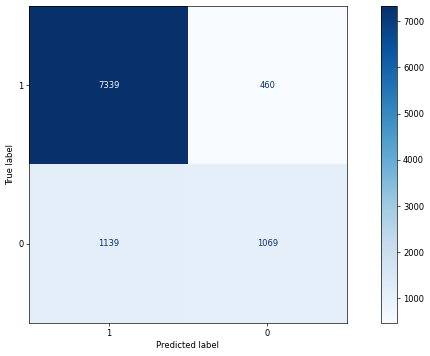

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    clf, X_eval, y_eval, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax
)
plt.show()

## Curva ROC

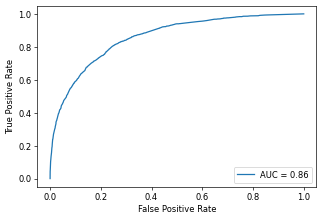

In [37]:
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## Feature Importance:

In [38]:
sorted(list(zip(X_train.columns, clf.feature_importances_)), key=lambda x: -x[1])

[('direccion_viento_tarde', 0.5826763302943901),
 ('nubosidad_temprano', 0.09873495578263713),
 ('barrio', 0.08337122235881247),
 ('mm_lluvia_dia', 0.07145548099459716),
 ('humedad_temprano', 0.04047594848262197),
 ('nubosidad_tarde', 0.03071267359174938),
 ('llovieron_hamburguesas_hoy', 0.013629994880310504),
 ('rafaga_viento_max_velocidad', 0.010417720253662773),
 ('presion_atmosferica_temprano', 0.009210910014060956),
 ('direccion_viento_temprano', 0.008158055593831023),
 ('presion_atmosferica_tarde', 0.007802847553875011),
 ('rafaga_viento_max_direccion', 0.005921388276603922),
 ('temp_max', 0.00520371594231964),
 ('temp_min', 0.004190424877595453),
 ('humedad_tarde', 0.003583631175498717),
 ('temperatura_tarde', 0.0021655702392880754),
 ('mm_evaporados_agua', 0.002003053075563433),
 ('mes', 0.001012185493349197),
 ('horas_de_sol', 0.0),
 ('temperatura_temprano', 0.0),
 ('velocidad_viendo_tarde', 0.0),
 ('velocidad_viendo_temprano', 0.0)]

In [13]:
X_train1 = preprocessing_arboles_1(X_train)

clf = tree.DecisionTreeClassifier(random_state=117, max_depth=13, min_samples_leaf=111, criterion='entropy')
clf.fit(X_train1, y_train)

df_pred = pd.read_csv("pred.csv")
df_pred_preprocess = basic_preprocessing(df_pred, prediction_dataset=True)
df_pred_preprocess = fill_numerical_missings(df_pred_preprocess, X_train)
df_pred_preprocess = df_pred_preprocess.drop(columns = ['id'])
df_pred_preprocess = preprocessing_arboles_1(df_pred_preprocess)

y_pred_final = clf.predict(df_pred_preprocess)
df_pred_final = pd.DataFrame({'id': df_pred['id'], 'llovieron_hamburguesas_al_dia_siguiente': y_pred_final})
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 1, 'llovieron_hamburguesas_al_dia_siguiente'] = 'si'
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 0, 'llovieron_hamburguesas_al_dia_siguiente'] = 'no'

df_pred_final['llovieron_hamburguesas_al_dia_siguiente'].value_counts()

no    24607
si     4485
Name: llovieron_hamburguesas_al_dia_siguiente, dtype: int64

In [9]:
df_pred_final.to_csv('predicciones/arbol_de_decision.csv', index=False)